In [3]:
%pip install --upgrade genism
import gensim
from gensim import corpora
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import pandas as pd

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_2355/2432958764.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv('./data/clean_titles.csv')
df.head()

,title,link,date,source,country,language,Manual Sentiment,translated_title,number_of_characters_title,number_of_words_title,...,final_redirected_URL,domain_of_URL,subdomain_of_URL,URL_depth,top_level_domain,url_length,author,Predicted_Sentiment,cleaned_title,dominant_topic
0,Iran uses Artificial Intelligence for maximizi...,https://news.google.com/rss/articles/CBMigAFod...,2023-05-07,ANI News,US,en,-1.0,Iran uses Artificial Intelligence for maximizi...,70,11,...,https://www.aninews.in/news/world/middle-east/...,www.aninews.in,www,4,in,128,[],negative,Iran uses Artificial Intelligence for maximizi...,"(3, 0.83875126)"
1,Mortgage Lenders See AI As Key To Operational ...,https://news.google.com/rss/articles/CBMiYGh0d...,2023-10-09,National Mortgage Professional,US,en,1.0,Mortgage Lenders See AI As Key To Operational ...,77,13,...,https://nationalmortgageprofessional.com/news/...,nationalmortgageprofessional.com,nationalmortgageprofessional,2,com,96,['Christine Stuart'],positive,Mortgage Lenders See AI As Key To Operational ...,"(1, 0.7388159)"
2,How the Threat of AI Coincided with the Writer...,https://news.google.com/rss/articles/CBMiX2h0d...,2023-10-04,The Spectator,US,en,-1.0,How the Threat of AI Coincided with the Writer...,59,13,...,https://seattlespectator.com/2023/10/04/how-th...,seattlespectator.com,seattlespectator,5,com,95,"['Hannah Mwangi', 'Volunteer Reporter']",negative,How the Threat of AI Coincided with the Writer...,"(0, 0.8398529)"
3,Telex : Le code source du ransomware HelloKitt...,https://news.google.com/rss/articles/CBMiwgFod...,2023-10-09,Le Monde Informatique,US,fr,0.0,Telex: HelloKitty ransomware source code revea...,129,22,...,https://www.lemondeinformatique.fr/actualites/...,www.lemondeinformatique.fr,www,2,fr,194,[],negative,Telex: HelloKitty ransomware source code revea...,"(3, 0.94173384)"
4,Is AI a Master or Slave? - Namibian,https://news.google.com/rss/articles/CBMiNGh0d...,2023-10-03,Namibian,US,en,-1.0,Is AI a Master or Slave? - Namibian,28,8,...,https://www.namibian.com.na/is-ai-a-master-or-...,www.namibian.com.na,www,2,na,52,"['Joschka Fischer', 'Please Enter Your Name He...",neutral,Is AI a Master or Slave?,"(0, 0.7332241)"


In [5]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


def preprocess_text(text):
    tokens = word_tokenize(text)
    # Remove punctuation and numbers
    table = str.maketrans('', '', string.punctuation + string.digits)
    tokens = [word.translate(table) for word in tokens]
    tokens = [token for token in tokens if token.lower() not in ['artificial', 'ai', 'intelligence'] and token not in stop_words and token not in string.punctuation]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [word for word in tokens if len(word) > 2]
    return tokens

In [6]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

processed_headlines = [preprocess_text(headline.lower()) for headline in df['cleaned_title']]

# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_headlines)
corpus = [dictionary.doc2bow(tokens) for tokens in processed_headlines]

# LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
for idx, topic in lda_model.print_topics():
    print(f'Topic {idx + 1}: {topic}')

dominant_topics = []
# Get the most dominant topic for each headline
for i, headline in enumerate(processed_headlines):
    headline = str(headline)
    bow = dictionary.doc2bow(preprocess_text(headline))
    topic = lda_model.get_document_topics(bow)
    dominant_topic = sorted(topic, key=lambda x: x[1], reverse=True)[0]
    dominant_topics.append(dominant_topic)
    
df['dominant_topic'] = dominant_topics
df.to_csv('data/clean_titles.csv', index=False)

[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic 1: 0.015*"new" + 0.012*"chatbot" + 0.010*"chatgpt" + 0.008*"human" + 0.006*"musk" + 0.006*"image" + 0.005*"elon" + 0.005*"technology" + 0.005*"data" + 0.004*"robot"
Topic 2: 0.017*"new" + 0.015*"generative" + 0.007*"model" + 0.007*"use" + 0.006*"law" + 0.006*"chatbot" + 0.006*"stock" + 0.006*"ibm" + 0.005*"top" + 0.005*"chatbots"
Topic 3: 0.015*"google" + 0.013*"generative" + 0.008*"make" + 0.007*"technology" + 0.007*"risk" + 0.005*"summit" + 0.005*"business" + 0.005*"global" + 0.005*"say" + 0.005*"gpt"
Topic 4: 0.021*"generative" + 0.021*"model" + 0.017*"launch" + 0.013*"new" + 0.013*"chatbot" + 0.012*"gpt" + 0.009*"meta" + 0.009*"tool" + 0.009*"language" + 0.008*"google"
Topic 5: 0.011*"generative" + 0.009*"tech" + 0.008*"gpt" + 0.008*"power" + 0.007*"chatbot" + 0.007*"big" + 0.006*"use" + 0.004*"threat" + 0.004*"samsung" + 0.004*"nvidia"


'''
Topic 0: 0.013*"generative" + 0.010*"new" + 0.007*"help" + 0.007*"launch" + 0.005*"tool" + 0.005*"aipowered" + 0.005*"make" + 0.005*"enterprise" + 0.005*"chatbots" + 0.005*"platform"
Topic 1: 0.060*"artificial" + 0.058*"intelligence" + 0.009*"generative" + 0.009*"chatbot" + 0.007*"musk" + 0.006*"human" + 0.006*"use" + 0.005*"risk" + 0.005*"elon" + 0.005*"say"
Topic 2: 0.031*"artificial" + 0.030*"intelligence" + 0.011*"new" + 0.010*"chatbot" + 0.010*"generative" + 0.010*"stock" + 0.009*"gpt" + 0.007*"launch" + 0.007*"chat" + 0.007*"expert"
Topic 3: 0.022*"model" + 0.012*"gpt" + 0.010*"new" + 0.009*"chatbot" + 0.009*"language" + 0.008*"open" + 0.008*"llm" + 0.007*"generative" + 0.007*"large" + 0.006*"market"
Topic 4: 0.025*"generative" + 0.012*"google" + 0.011*"meta" + 0.011*"new" + 0.010*"intelligence" + 0.009*"chatbot" + 0.009*"artificial" + 0.008*"tool" + 0.007*"launch" + 0.007*"model"
'''

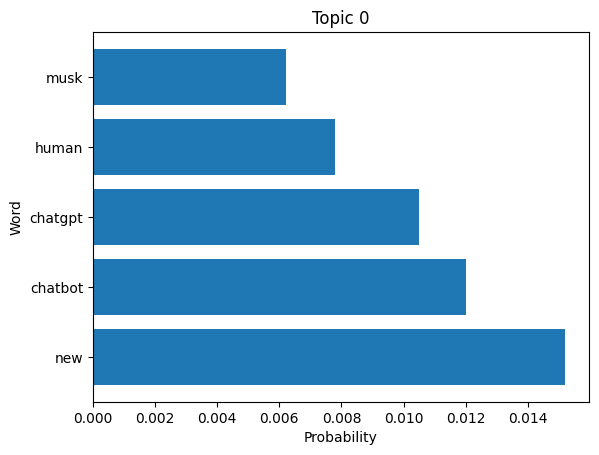

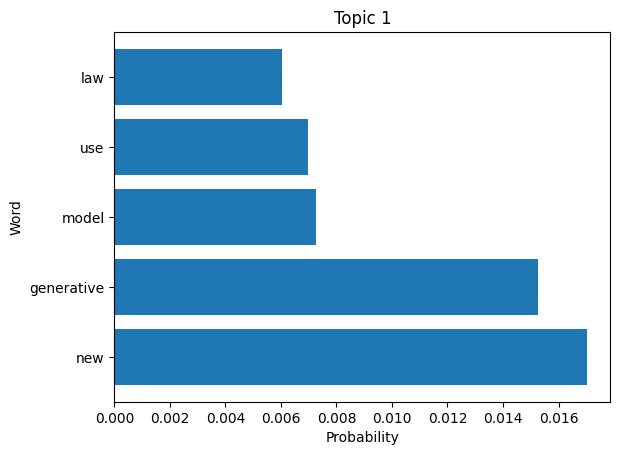

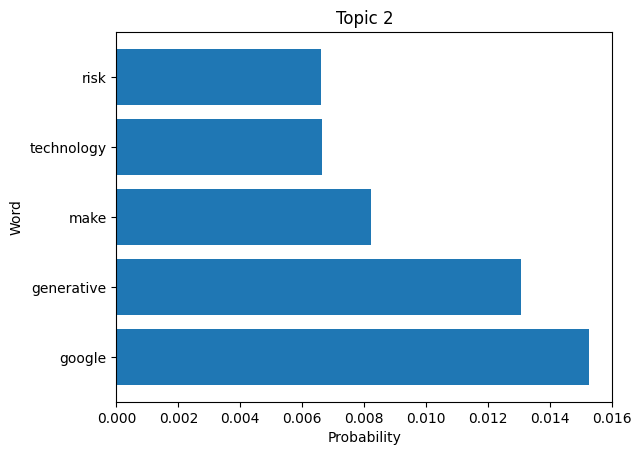

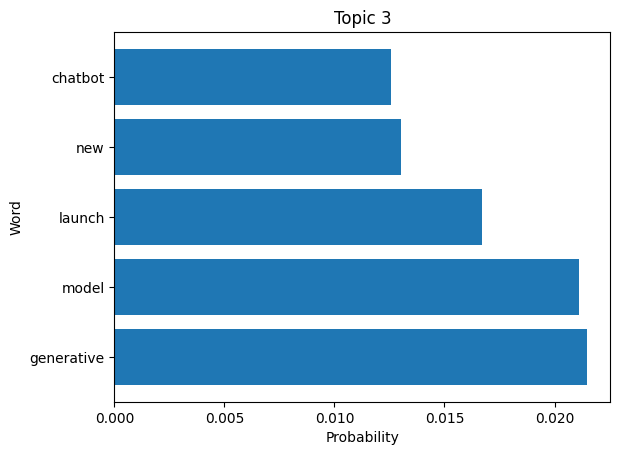

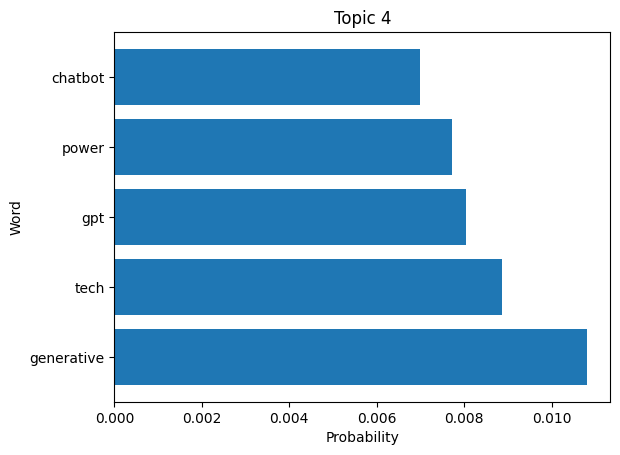

In [7]:
import matplotlib.pyplot as plt

def visualize_topics(lda_model):
    topics = lda_model.show_topics(num_topics=10, num_words=5, formatted=False)
    for topic_idx, topic_words in topics:
        words = [word[0] for word in topic_words]
        probabilities = [word[1] for word in topic_words]
        plt.barh(words, probabilities)
        plt.title(f"Topic {topic_idx}")
        plt.xlabel("Probability")
        plt.ylabel("Word")
        plt.show()

# Visualize the topics
visualize_topics(lda_model)


In [10]:
%pip install pyLDAvis

import pandas as pd
import pyLDAvis
import pyLDAvis.gensim

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=2355) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/home/vscode/.local/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/home/vscode/.local/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/home/vscode/.local/lib/python3.12/site-packages/joblib/_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
/home/vscode/.local/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/home/vscode/.local/lib/python3.12/site-packages/joblib/_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value i

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.042044  0.082816       1        1  28.468992
1     -0.030366 -0.036277       2        1  18.798789
2      0.009519  0.136598       3        1  18.441957
0     -0.159162 -0.065234       4        1  17.718614
4      0.137965 -0.117903       5        1  16.571648, topic_info=         Term        Freq       Total Category  logprob  loglift
56        new  206.000000  206.000000  Default  30.0000  30.0000
189     model  166.000000  166.000000  Default  29.0000  29.0000
20     launch  130.000000  130.000000  Default  28.0000  28.0000
93     google  128.000000  128.000000  Default  27.0000  27.0000
53        gpt  119.000000  119.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
73       open   10.462225   52.817633   Topic5  -5.8303   0.1784
150  chatbots   10.701500   70.455973   Topic5  -5.8077  -0.0871
72     future   10.242037   60.509318   Topic5  -5.8516   0.0212
639      chat   10.038446   57.084782   Topic5  -5.8716   0.0594
519      next    9.637621   34.140275   Topic5  -5.9124   0.5327

[349 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3806      2  0.912189      actor
296       1  0.287739    advance
296       4  0.647413    advance
1491      5  0.952377  advantage
101       3  0.659251     agency
...     ...       ...        ...
1329      5  0.805957      worst
538       2  0.781636    writing
538       5  0.234491    writing
205       4  0.969114        xai
360       1  0.917288        yet

[537 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1, 5])

/usr/local/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=2355) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


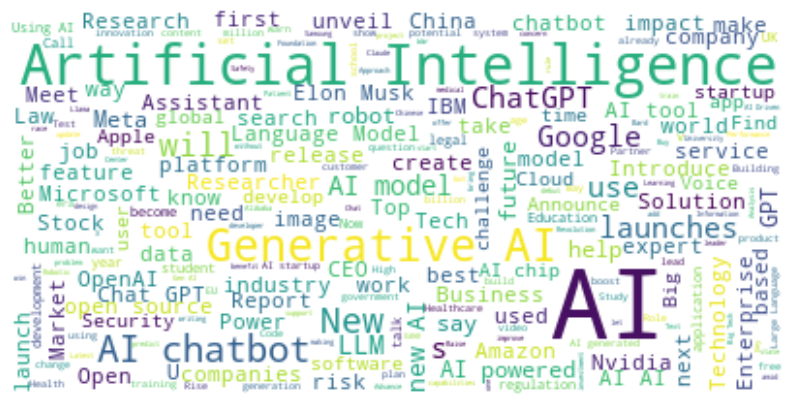

In [15]:
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
sw = STOPWORDS


text = " ".join(i for i in df['cleaned_title'])
wc2 = WordCloud(stopwords=sw, background_color="white", max_words=300).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.show()